In [317]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import numpy as np
import rasterio

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns


## 1. Importing the data

Data from Den Haag in Cijfers and CBS is taken and clubbed in a final excel sheet. The sheet is then uploaded here for further data cleaning and exploratory data analysis. The wijk geodata was also downloaded from https://data.overheid.nl/dataset/wijken and will be used in the following notebook for spatial analysis

In [318]:
dir = './data/Wijken/wijken.shp'
hague = gpd.read_file(dir)
type(hague)

geopandas.geodataframe.GeoDataFrame

In [319]:
hague.shape

(44, 9)

We see that there are a total of **44 Neighbourhoods (Wijks)** for which data is available.

In [320]:
#separating the geometry and the wijkcode to merge later with the larger dataset
hague1 = hague[['WIJKCODE','geometry']]
#converting the datatype to numeric
hague1['WIJKCODE'] = pd.to_numeric(hague1['WIJKCODE'], errors='coerce')
#sorting the table according to wijkcode
hague1.sort_values(by='WIJKCODE', inplace=True)

In [321]:
hague1.head(2)

,WIJKCODE,geometry
43,1,"POLYGON ((80000.000 461231.903, 80276.469 4610..."
42,2,"POLYGON ((79699.616 459495.372, 79908.678 4592..."


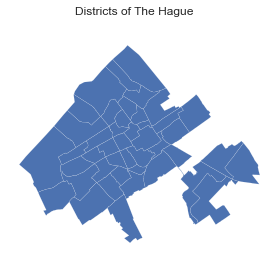

In [322]:
#Plotting the districts
f, ax = plt.subplots(1)
hague1.plot(ax=ax, alpha=1, linewidth=0.1)
ax.set_axis_off()
f.suptitle('Districts of The Hague')
plt.show()

Importing the datafile of the variables: 

In [323]:
df = pd.read_excel('./data/Data_Final.xlsx')

In [324]:
df.columns = df.iloc[1]

In [325]:
df = df.drop([0, 1])

In [326]:
df.reset_index(drop=True, inplace=True)
df.index += 1

In [327]:
df.head(2)

1,Wijk,65-year-olds and above (%),0 to 19-year-olds (%),Special Needs (%),Medical facilities (%),Average age of population (years),Average household size (person),Rental Housing (%),Distance to large supermarket (km),Average price of residential properties sold (€),Distance to fire stations (km),Residential Density (houses/Ha),Unemployed women %,Female population (%),Single parent households (%),Distance to daycare centres (km),Unemployed Workforce (persons),Average number of private cars per home (%),Average disposable income (€),Owner-occupied homes (%),No of residential properties sold (houses),Single-person households (%),Voter turnout (%),Social Cohesion score (0-10),Unsafe feeling population (%),Distance to attractions (km),Reported violent crimes (%),Dutch native population (%),Moroccan population (%),Turkish population (%),Surinamese population (%),Total migration (persons),Low educated population (%),High educated population (%),Non - Dutch speaking (persons),No of schools in 1km (schools)
1,1 Oostduinen,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x
2,2 Belgisch Park,0.209,0.22,0.171,1.9,42.4,2.02,0.364,0.5,551399,2.2,44.1,0.496,0.51,0.063,0.5,150,0.7,60700,0.634,146,0.495,0.785,6.5,0.025,1.2,0.071,0.618,0.006,0.008,0.02,-37,0.18,0.47,1035,1.9


Creating a WIJKCODE column to match the shp files and separating the names of the wijks

In [328]:
# Codes from the names of the wijks are separated
df['WIJKCODE'] = df['Wijk'].str.extract(r'^(\d+)')

#changing the dtype from object to int64
df['WIJKCODE'] = pd.to_numeric(df['WIJKCODE'], errors='coerce')

# Codes from the names of the wijks are separated
df['Wijk'] = df['Wijk'].str.replace(r'^\d+\s+', '')

# setting the wijkcode column first
df = df[['WIJKCODE'] + [col for col in df.columns if col != 'WIJKCODE']]

In [329]:
df.head(3)

1,WIJKCODE,Wijk,65-year-olds and above (%),0 to 19-year-olds (%),Special Needs (%),Medical facilities (%),Average age of population (years),Average household size (person),Rental Housing (%),Distance to large supermarket (km),Average price of residential properties sold (€),Distance to fire stations (km),Residential Density (houses/Ha),Unemployed women %,Female population (%),Single parent households (%),Distance to daycare centres (km),Unemployed Workforce (persons),Average number of private cars per home (%),Average disposable income (€),Owner-occupied homes (%),No of residential properties sold (houses),Single-person households (%),Voter turnout (%),Social Cohesion score (0-10),Unsafe feeling population (%),Distance to attractions (km),Reported violent crimes (%),Dutch native population (%),Moroccan population (%),Turkish population (%),Surinamese population (%),Total migration (persons),Low educated population (%),High educated population (%),Non - Dutch speaking (persons),No of schools in 1km (schools)
1,1,Oostduinen,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x
2,2,Belgisch Park,0.209,0.22,0.171,1.9,42.4,2.02,0.364,0.5,551399,2.2,44.1,0.496,0.51,0.063,0.5,150,0.7,60700,0.634,146,0.495,0.785,6.5,0.025,1.2,0.071,0.618,0.006,0.008,0.02,-37,0.18,0.47,1035,1.9
3,3,Westbroekpark/Duttendel,0.416,0.196,0.204,2,52.4,1.67,0.272,1.4,916514,2.4,6,0.44,0.553,0.042,0.6,20,0.97,91000,0.719,56,0.426,0.9,6.7,0.005,1,0.042,0.648,0.003,0.002,0.005,92,0.1,0.64,290,1.6


## 2. Data Cleaning

In [330]:
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
1
WIJKCODE                                             int64
Wijk                                                object
65-year-olds and above (%)                          object
0 to 19-year-olds (%)                               object
Special Needs (%)                                   object
Medical facilities (%)                              object
Average age of population (years)                   object
Average household size (person)                     object
Rental Housing (%)                                  object
Distance to large supermarket (km)                  object
Average price of residential properties sold (€)    object
Distance to fire stations (km)                      object
Residential Density (houses/Ha)                     object
Unemployed women %                                  object
Female population (%)                               object
Single parent households (%)                        object
Distance to daycare centres

In [332]:
#Making the datatypes numeric and eliminating the values apart from NaNs
numeric_columns = df.columns[2:]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

Merging with the shp file

In [335]:
df1 = pd.merge(hague1, df, how = 'inner', on='WIJKCODE')

Eliminating the neighbourhoods with minimal to no data

As Wijk 1 Oostduinen has almost no data available, it is excluded from the analysis

In [336]:
df1.drop(0, inplace=True)

In [338]:
df1.head(3)

,WIJKCODE,geometry,Wijk,65-year-olds and above (%),0 to 19-year-olds (%),Special Needs (%),Medical facilities (%),Average age of population (years),Average household size (person),Rental Housing (%),Distance to large supermarket (km),Average price of residential properties sold (€),Distance to fire stations (km),Residential Density (houses/Ha),Unemployed women %,Female population (%),Single parent households (%),Distance to daycare centres (km),Unemployed Workforce (persons),Average number of private cars per home (%),Average disposable income (€),Owner-occupied homes (%),No of residential properties sold (houses),Single-person households (%),Voter turnout (%),Social Cohesion score (0-10),Unsafe feeling population (%),Distance to attractions (km),Reported violent crimes (%),Dutch native population (%),Moroccan population (%),Turkish population (%),Surinamese population (%),Total migration (persons),Low educated population (%),High educated population (%),Non - Dutch speaking (persons),No of schools in 1km (schools)
1,2,"POLYGON ((79699.616 459495.372, 79908.678 4592...",Belgisch Park,0.209,0.220,0.171,1.9,42.4,2.02,0.364,0.5,551399.0,2.2,44.1,0.496,0.510,0.063,0.5,150.0,0.70,60700.0,0.634,146.0,0.495,0.785,6.5,0.025,1.2,0.071,0.618,0.006,0.008,0.020,-37.0,0.18,0.47,1035.0,1.9
2,3,"POLYGON ((81024.631 458499.461, 81014.715 4584...",Westbroekpark/Duttendel,0.416,0.196,0.204,2.0,52.4,1.67,0.272,1.4,916514.0,2.4,6.0,0.440,0.553,0.042,0.6,20.0,0.97,91000.0,0.719,56.0,0.426,0.900,6.7,0.005,1.0,0.042,0.648,0.003,0.002,0.005,92.0,0.10,0.64,290.0,1.6
3,4,"POLYGON ((82509.303 458410.474, 82525.610 4583...",Benoordenhout,0.265,0.229,0.151,1.5,45.1,1.93,0.264,0.6,660538.0,2.5,26.0,0.488,0.528,0.050,0.8,120.0,0.78,78600.0,0.729,319.0,0.435,0.912,6.8,0.008,2.5,0.044,0.567,0.003,0.006,0.007,-55.0,0.09,0.74,2175.0,1.6


In [339]:
null_values = df1.isnull().sum()
print("Null values in each column:")
print(null_values)

Null values in each column:
WIJKCODE                                             0
geometry                                             0
Wijk                                                 0
65-year-olds and above (%)                           0
0 to 19-year-olds (%)                                1
Special Needs (%)                                    0
Medical facilities (%)                               0
Average age of population (years)                    0
Average household size (person)                      0
Rental Housing (%)                                   0
Distance to large supermarket (km)                   0
Average price of residential properties sold (€)     5
Distance to fire stations (km)                       0
Residential Density (houses/Ha)                      0
Unemployed women %                                   0
Female population (%)                                0
Single parent households (%)                         1
Distance to daycare centres (km)     

In [340]:
df1.fillna(df1.mean(), inplace=True)  ##Filling the null values with mean values for the time being

In [341]:
df1.shape

(43, 38)

In [342]:
df1.describe()

,WIJKCODE,65-year-olds and above (%),0 to 19-year-olds (%),Special Needs (%),Medical facilities (%),Average age of population (years),Average household size (person),Rental Housing (%),Distance to large supermarket (km),Average price of residential properties sold (€),Distance to fire stations (km),Residential Density (houses/Ha),Unemployed women %,Female population (%),Single parent households (%),Distance to daycare centres (km),Unemployed Workforce (persons),Average number of private cars per home (%),Average disposable income (€),Owner-occupied homes (%),No of residential properties sold (houses),Single-person households (%),Voter turnout (%),Social Cohesion score (0-10),Unsafe feeling population (%),Distance to attractions (km),Reported violent crimes (%),Dutch native population (%),Moroccan population (%),Turkish population (%),Surinamese population (%),Total migration (persons),Low educated population (%),High educated population (%),Non - Dutch speaking (persons),No of schools in 1km (schools)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.00000,43.000000,4.300000e+01,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,22.976744,0.197047,0.202048,0.216907,1.823256,41.890698,2.049070,0.50893,0.746512,5.021972e+05,1.995349,42.795349,0.479558,0.503860,0.064452,0.469767,821.111111,0.699268,51053.658537,0.480953,164.609756,0.482419,0.808333,5.926471,0.042061,2.732558,0.069970,0.480047,0.040949,0.060805,0.064550,-3.097561,0.252750,0.418605,3047.209302,2.448837
std,12.521388,0.128276,0.053321,0.058475,1.732716,7.429921,0.542638,0.20382,0.369265,2.258452e+05,0.637313,32.308962,0.107661,0.027996,0.017126,0.152026,820.695924,0.205616,16808.700944,0.205148,112.442764,0.122308,0.516835,0.584852,0.035499,1.281874,0.019732,0.186273,0.043807,0.073472,0.047585,465.807021,0.133719,0.187764,3620.089334,1.691065
min,2.000000,0.045000,0.045000,0.110000,0.000000,32.500000,1.100000,0.07700,0.300000,2.494280e+05,0.900000,0.200000,0.222000,0.387000,0.011000,0.300000,20.000000,0.320000,25200.000000,0.000000,1.000000,0.230000,0.145000,4.800000,0.002000,1.000000,0.030000,0.066000,0.001000,0.002000,0.005000,-1886.000000,0.040000,0.080000,5.000000,0.000000
25%,12.500000,0.112500,0.177500,0.174000,0.900000,37.250000,1.770000,0.36900,0.500000,3.108145e+05,1.550000,9.150000,0.443000,0.490000,0.054000,0.400000,245.000000,0.565000,40050.000000,0.355000,73.500000,0.430500,0.574000,5.500000,0.012500,1.750000,0.057000,0.368500,0.007000,0.008500,0.019500,-62.000000,0.150000,0.270000,350.000000,1.450000
50%,23.000000,0.167000,0.202000,0.206000,1.500000,40.400000,1.970000,0.50900,0.600000,4.759470e+05,2.000000,41.600000,0.475000,0.506000,0.065000,0.400000,740.000000,0.670000,46000.000000,0.491000,164.609756,0.489000,0.689000,5.926471,0.041000,2.500000,0.069970,0.499000,0.027000,0.030000,0.057000,-3.097561,0.220000,0.420000,2010.000000,2.100000
75%,33.500000,0.243500,0.231500,0.260500,2.150000,44.900000,2.220000,0.63350,0.900000,5.380115e+05,2.350000,67.750000,0.497500,0.517000,0.078500,0.500000,870.000000,0.795000,60550.000000,0.624500,239.500000,0.539000,0.887000,6.450000,0.042530,3.200000,0.076500,0.619500,0.045500,0.090000,0.102000,80.500000,0.305000,0.560000,4277.500000,3.050000
max,44.000000,0.712000,0.294000,0.421000,9.700000,71.100000,4.330000,1.00000,1.600000,1.233027e+06,3.400000,101.900000,1.000000,0.558000,0.097000,0.900000,3730.000000,1.140000,92500.000000,0.923000,443.000000,0.856000,3.659000,7.100000,0.152000,6.300000,0.133000,0.802000,0.202000,0.284000,0.170000,1838.000000,0.590000,0.810000,15220.000000,8.500000


The dataset consists of 43 wijks and 35 vartiables. 

In [352]:
#the dataframe is saved for further analysis
df1.to_csv('data/Sovidata.csv', index=False)

## 3. Distribution Analysis

### 3.1 Illustrating the distribution through histograms:

The dataset was explored using histograms and and plots to see how the data is distributed across the different wijks of The Hague. 

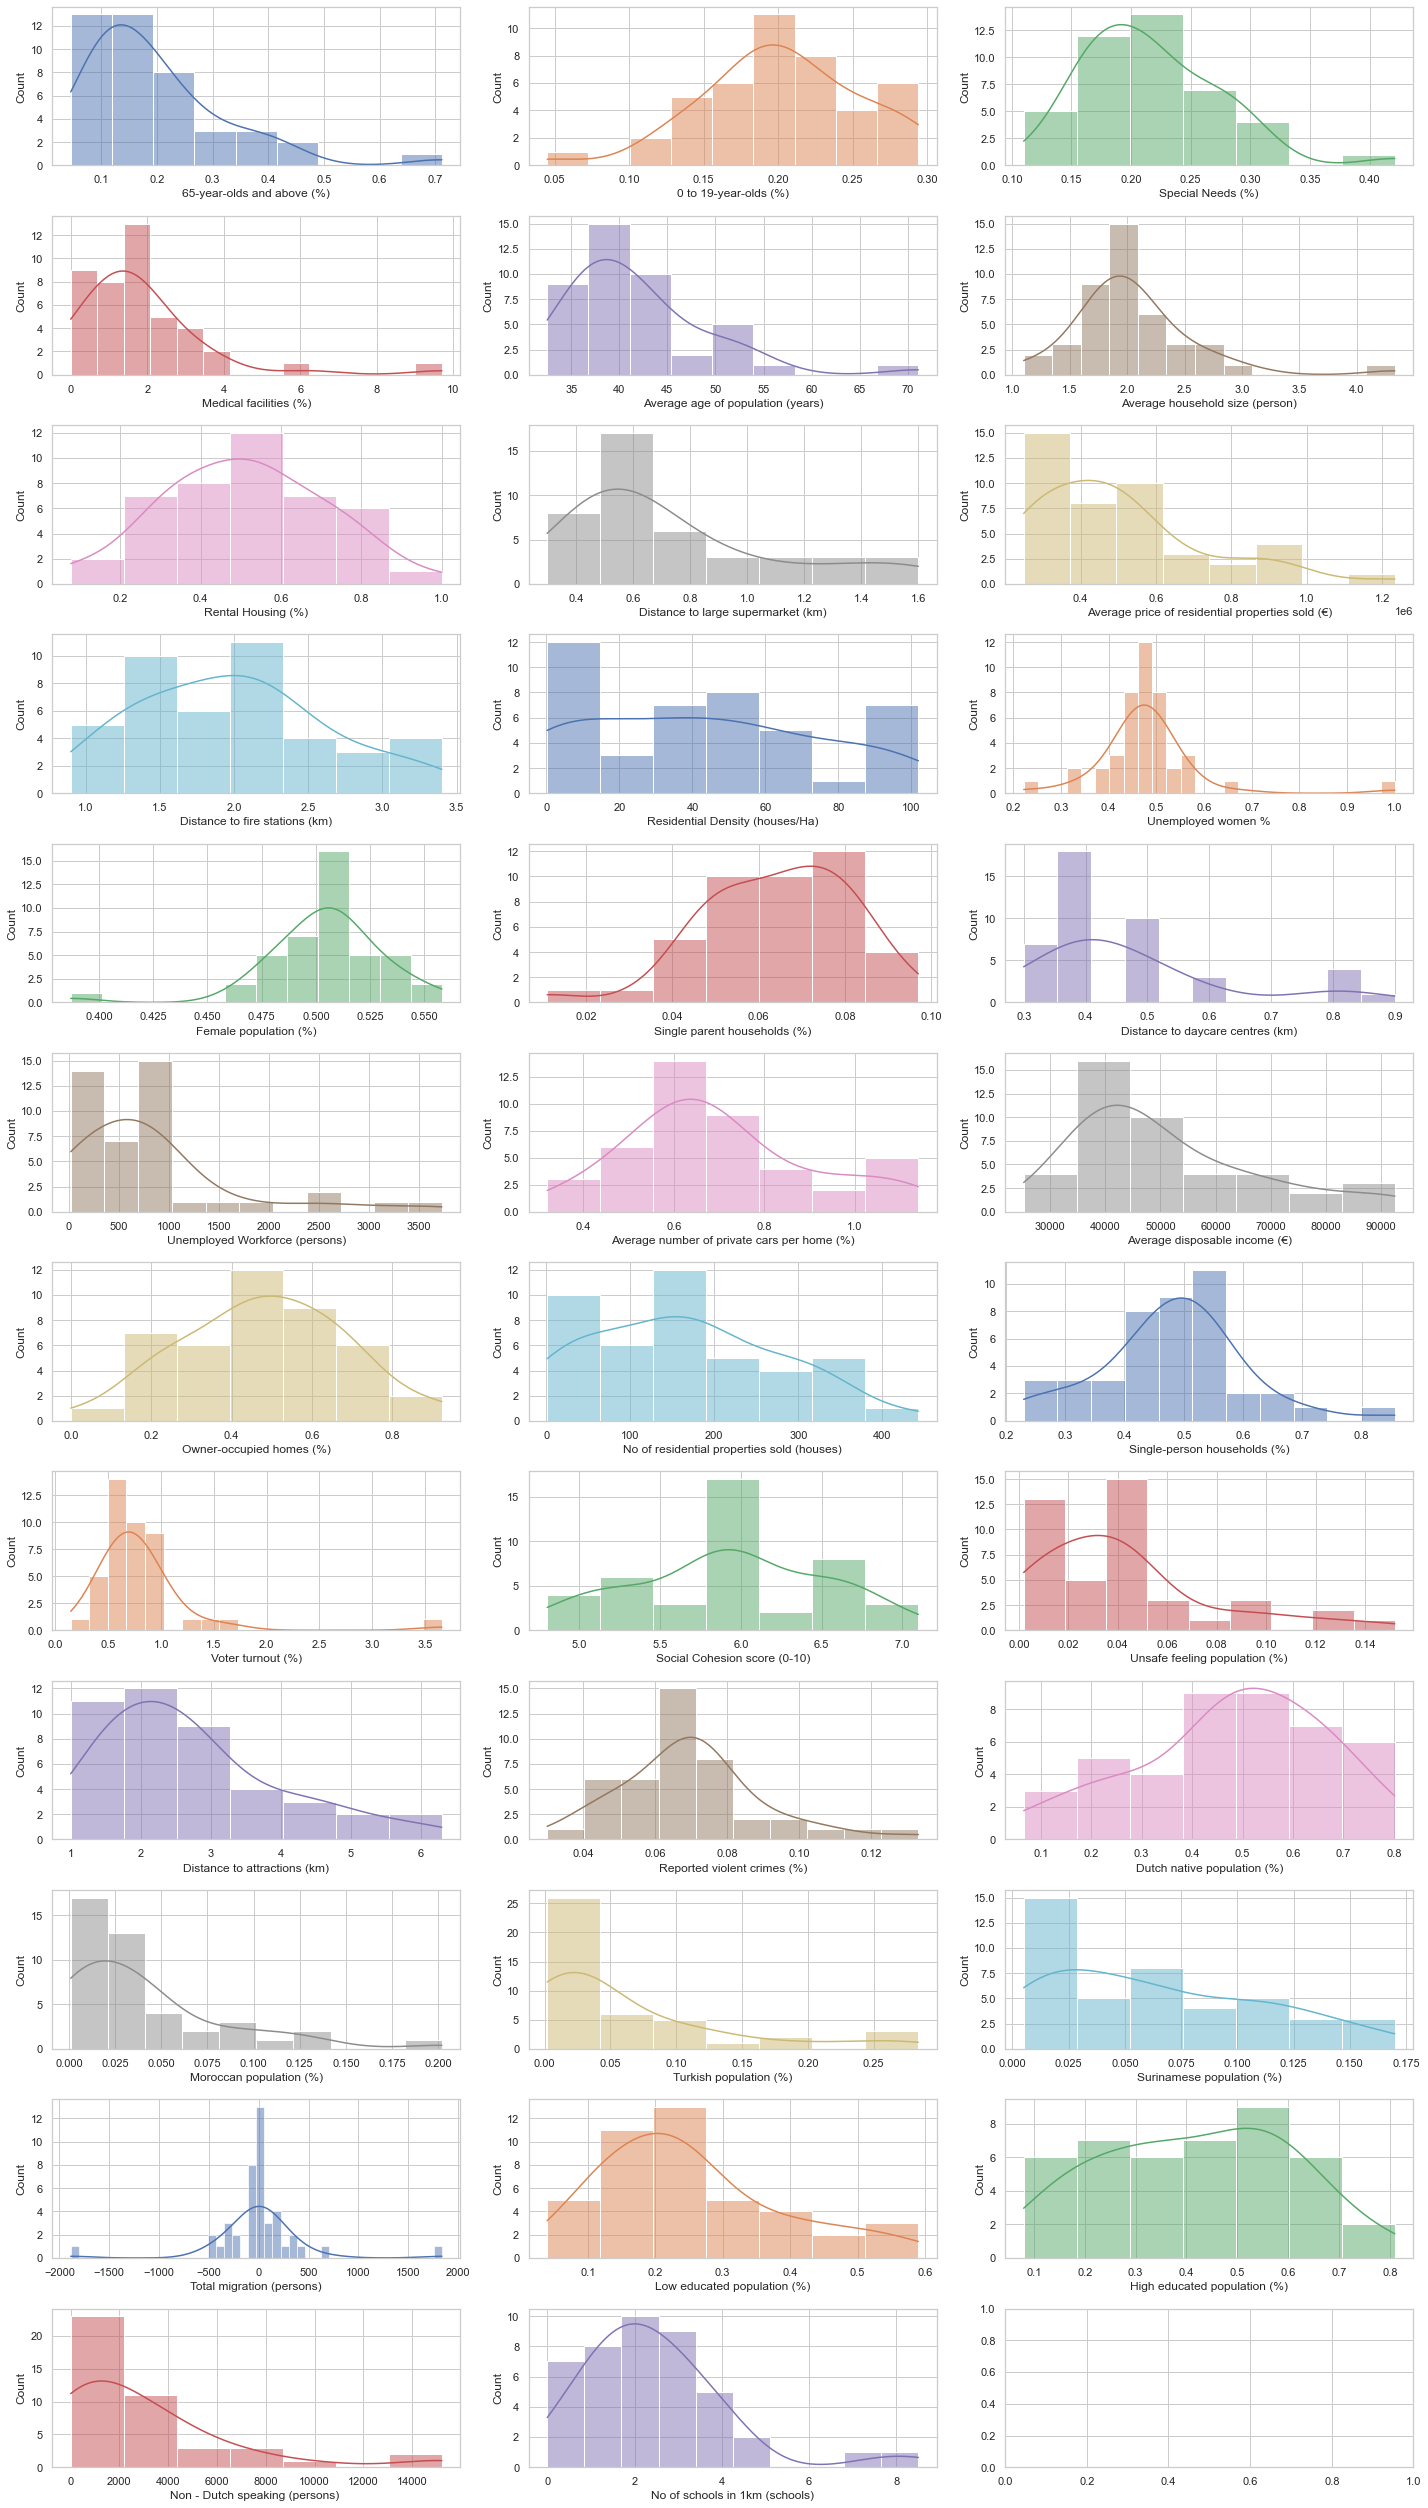

In [343]:
# Set plot style
sns.set(style="whitegrid")

# Number of rows and columns for subplots are set
n_var = len(df1.columns)
nrows = 12
ncols = 3

# Subplots created
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 35)) 

# Axes flattened for easier iteration
axes = axes.flatten()

color_palette = sns.color_palette()

# Histograms for each feature with different colors plotted
for i, column in enumerate(df1.columns[3:]):
    color = color_palette[i % len(color_palette)]  # Cycle through the color palette
    sns.histplot(df1[column], kde=True, color=color, ax=axes[i])
    #axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Empty subplots hidden
for j in range(n_var, n_var): #nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

The above plots display the distribution of all the 35 indicators.The histograms above display the distributions of various variables in the dataset. The histograms represents the frequency distribution of each variable, with the x-axis representing the range of values and the y-axis representing the frequency of occurrence. Overall, the distributions vary widely across the variables indicating diverse data patterns. However, one can notice a few anomalies that can be worked on. As the NaN values were replaced by the mean, it is noticable in variables like the **cial cohesion score** and **single person households %** and must be worked on.          

In [344]:
# plt.savefig('distribution.png')

### 3.2 Mapping boxplots to indentify outliers: 

As MIT Critical Data (2016) recommended, boxplots were made to gain insights into the distribution of the social vulnerability index variables and detect outliers. From the boxplots; it can be seen that variables such as Non-Dutch Speaking persons % and % moroccan population is concentrated highly in certain neighbourhoods and not evenly distributed. It can be concluded that the dataset contains outliers for various vulnerability indicators; however, as these outliers represent real values that are useful for gaining insights into the spatial distribution of social vulnerability variables, it was decided to retain the outliers and not deal with them.

In [345]:
# creating a separate dataframe with just the variables for exploration
columns_to_exclude = ['WIJKCODE', 'geometry', 'Wijk']

# Select all columns except the ones to exclude
var_df = df1.drop(columns=columns_to_exclude)


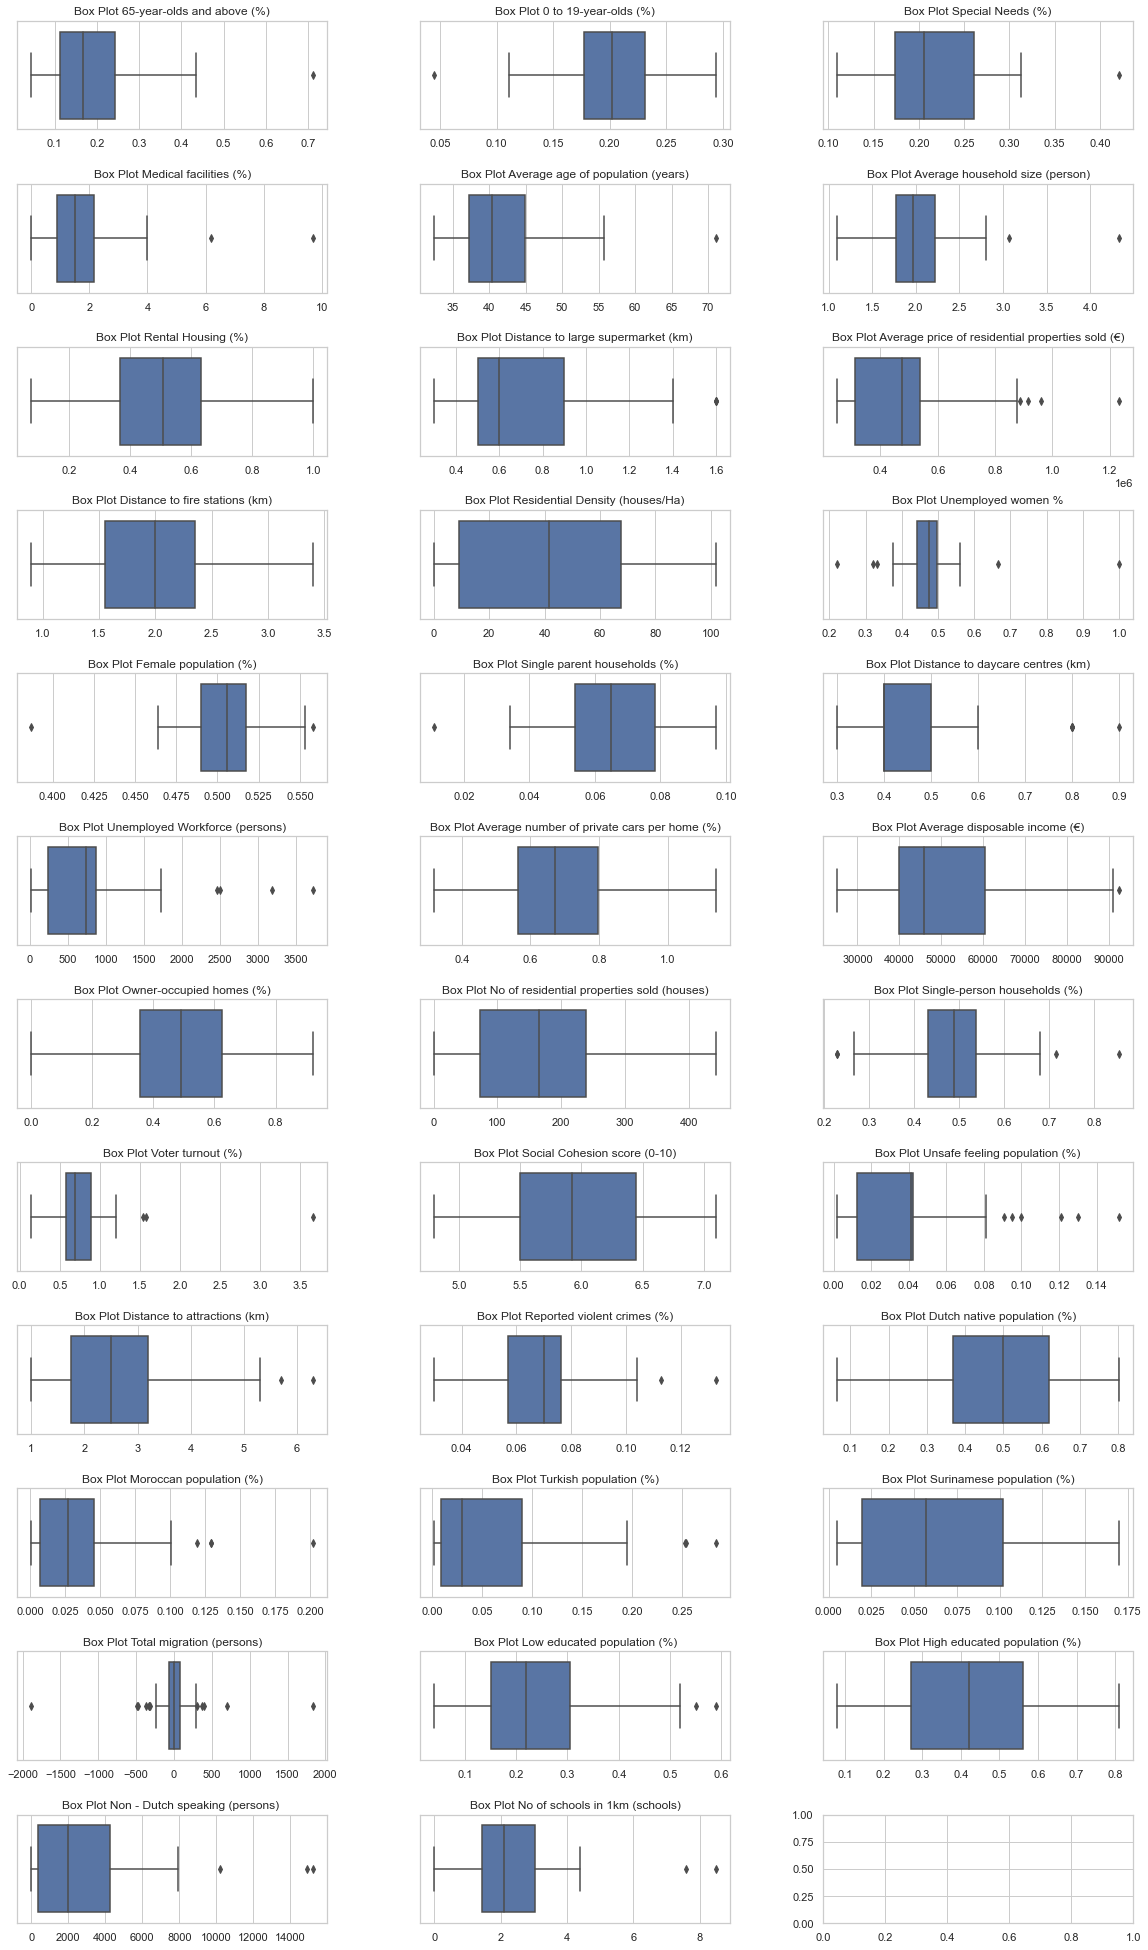

In [346]:

sns.set(style="whitegrid")

n_var = len(var_df.columns)
nrows = 12
ncols = 3    

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 35), 
                         gridspec_kw={'hspace': 0.5, 'wspace': 0.3})

axes = axes.flatten()

for i, column in enumerate(var_df.columns):
    if i < n_var:
        sns.boxplot(x=var_df[column], ax=axes[i])
        axes[i].set_title(f'Box Plot {column}')
        axes[i].set_xlabel('')
    else:
        fig.delaxes(axes[i])

for j in range(n_var,n_var):
    fig.delaxes(axes[j])

plt.show()



In [ ]:
# plt.savefig('boxplots.png')

### 3.3 Mapping the distribution of variables across districts: 

The map below represents the % reports of violent crimes that take place in The Hague. As can be seen, the wijk **Stationsbuurt** has the highest reported crimes, followed by **Centrum**, whereas the wijk **Vruchtenbuurt** reports the lowest crimes

<function matplotlib.pyplot.show(close=None, block=None)>

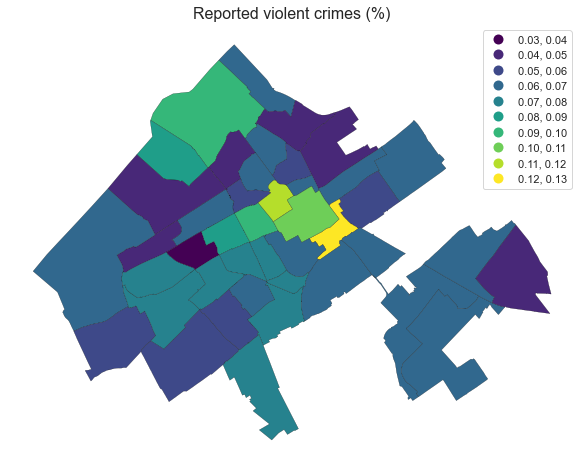

In [347]:
fig, ax = plt.subplots(figsize=(14,8))
column= df1.columns[28]
df1.plot(column, scheme='equal_interval', k=10, 
         cmap=plt.cm.viridis, alpha=1,
         edgecolor='black', linewidth=0.2, legend=True, ax=ax)
ax.set_axis_off()
ax.set_title(column, fontsize=16)
plt.show

In [378]:
# plt.savefig('plot_violentcrimes_dist1.png')

### Alternatively, using ESDA (Exploratory Spatial Data Analysis)

The gain more insights into the geographic distribution of the variables across The Hague, we will utelise the tools provided by ESDA. The PYSAL package is used. Plotting the spatial data requires defining the number of clusters, we use the SKlearns K-means package as it will work on reducing the distance between points in a similar cluster. Elbow method used to define the number of clusters to be split into such that the no of clusters does not impact the distortion score. 

In [355]:
from sklearn.cluster import KMeans

In [360]:
X = var_df.values
k_values = range(1, 10) #setting an arbitrary limit of 30 clusters

In [361]:
distortions = []

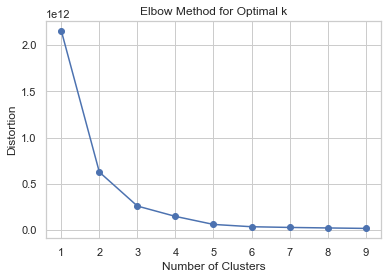

In [362]:
for k in k_values:
    # Fit KMeans clustering with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Append the distortion score to the list
    distortions.append(kmeans.inertia_)
    
plt.plot(k_values, distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.xticks(k_values)
plt.show()

Drop is highest from 4 to 5 clusters and slope becomes negligible after 6. Therefore the no of clusters selected is 5 for the analysis.

<function matplotlib.pyplot.show(close=None, block=None)>

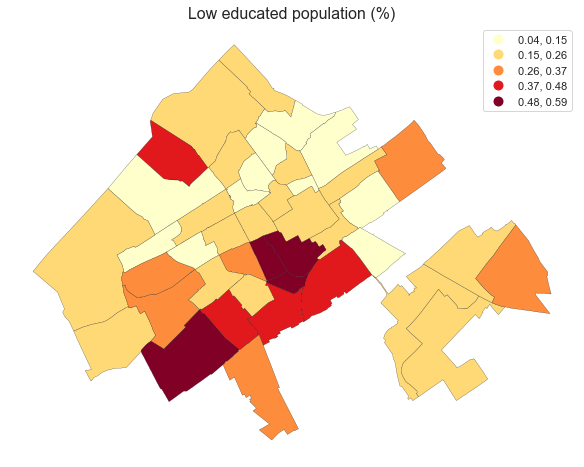

In [380]:
fig, ax = plt.subplots(figsize=(14,8))
column= df1.columns[34]
df1.plot(column, scheme='equal_interval', k=5, 
         cmap=plt.cm.YlOrRd, alpha=1,
         edgecolor='black', linewidth=0.2, legend=True, ax=ax)
ax.set_axis_off()
ax.set_title(column, fontsize=16)
plt.show

In [379]:
# plt.savefig('plot_violentcrimes_dist2.png')

## Correlation Analysis

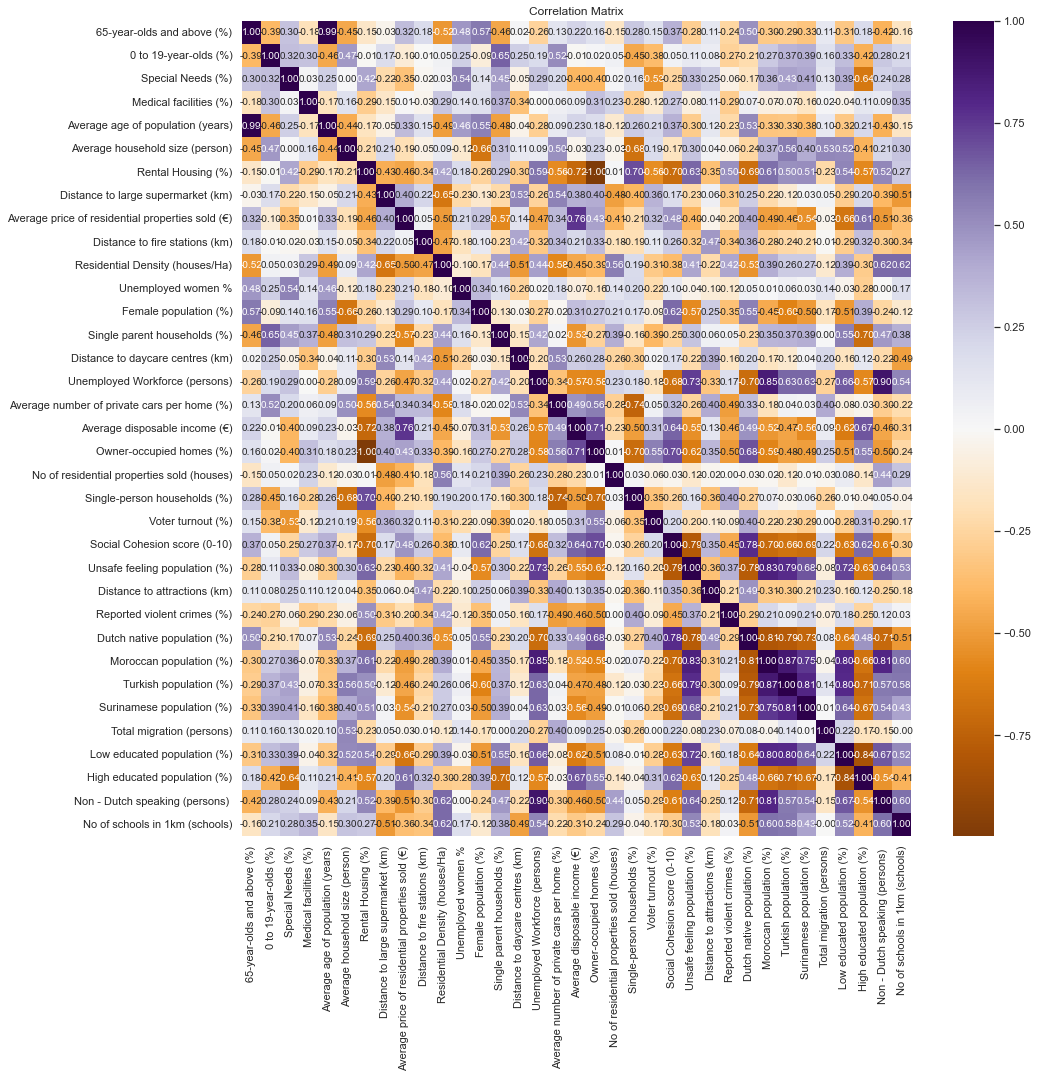

In [300]:
# Calculate correlation matrix
correlation_matrix = var_df.corr()

# Plot correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='PuOr', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [299]:
# plt.savefig('correlation_matrix.png')

Correlations can be seen from the above matrix - <br> - The unemployed workforce correlates with non-dutch speaking population <br>
- We can also see that the non-dutch population lives close to each other as the different ethnic groups show high correlation <br>
- The average income of a neighbourhood corelates with the prices of the houses being sold in the same neighbourhood

The analysis will further continue in the next notebook called the Principal Component Analysis where the following steps can be seen: <br>
- Data preprocessing: Non relevant features are removed, standardization
- PCA testing (Bartlett's test of Sphericity, Kaiser-Meyer-Olkin (KMO) Test)
- Principal Component Analysis